**Exercise 5.2** This exercise asks you to experiment with Rule 110 and some of its spaceships.

1. Read the Wikipedia page about Rule 110, which describes its background pattern and spaceships.

2. Create a Rule 110 CA with an initial condition that yield the stable background pattern.

3. Modify the initial condition by adding different patterns in the center of the row and see which ones yield spaceships. You might want to enumerate all possible patterns of `n` bits, for some reasonable value of `n`. For each spaceship, can you find the period and rate of translation? What is the biggest spaceship you can find?

4. What happens when spaceships collide?

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from Cell1D import Cell1D


We first define the function to generate the CA based on the given rule and starting string which uses the `Cell1D` class provided.

In [50]:
def draw_ca(rule, start = None, n = None):
    if start is None:
        cols = 8
    else:
        cols = len(start)   
    if n is None:
        n = cols
    else:
        n = n
    # cols is the columns of the image
    ca = Cell1D(rule, n, cols)
    ca.start_string(start)
    ca.loop(n-1)
    ca.draw()

Now, using the starting string '00010011011111', we can generate the desired background pattern for Rule 110 (with adjustment to the image size).

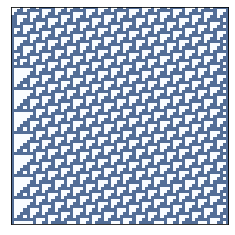

In [51]:
background = '00010011011111'
draw_ca(110, background*5)

Spaceship (1) translates to the right is given by the sequence '0001110111' surrounded by the background pattern. We need to use a combination of the background and the spaceship 1 as the input sequence.

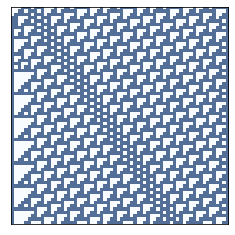

In [52]:
spaceship1 = '0001110111'
draw_ca(110, spaceship1 + background*4)

This spaceship moves 2 cells for every period and its period is around 3 generations.

Spaceship (2) is another spaceship that translates to the left and is comprised by the sequence '1001111' surrounded by the background pattern.

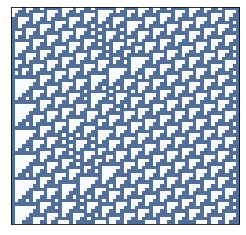

In [54]:
spaceship2 = '1001111'
draw_ca(110, background*2 + spaceship2 + background*2, 60)

It repeates every 30 generations and translates to the left at around 7 cells per generation.

Lastly, Spaceship (3) comprises the sequence '111' surrounded by the background pattern.

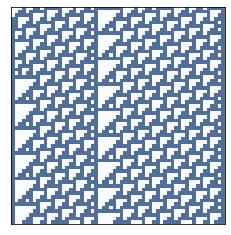

In [55]:
spaceship3 = '111'
draw_ca(110, background*2 + spaceship3 + background*2, 60)

Looking at the repeating structure, this spaceship is stationary so its rate of transition is zero, while its period is around 7 generations.

To observe collisions, we combine the spaceship patterns and let the CA evolve.

**Collision of spaceship 1 and spaceship 2:**

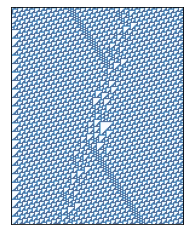

In [56]:
init12 = background*3 + spaceship1 + background*3 + spaceship2 + background*3
draw_ca(110, init12, 180)

Here we see that upon collision, spaceship 1 passes through spaceship 2 and is translated to the left.

**For the collision of spaceship 1 and spaceship 3:**

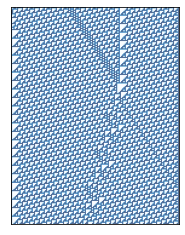

In [57]:
init13 = background*3 + spaceship1 + background*3 + spaceship3 + background*3
draw_ca(110, init13, 180)

In this collision, we see that spaceship 2 is produced while spaceships 1 and 3 vanish. Also, a new spaceship is created that translates to the right and its period is around 2 generations.